In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_1/2k_my_teams_analysis/data/myteams_data.csv'

myteam_player_data = pd.read_csv(file_path)

In [4]:
myteam_player_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [25]:
myteam_player_data

,Player_Name,team,School,Theme_Type,Postion,Weight,Height,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
0,Dwyane Wade,Miami Heat,Marquette,Rewards,SG/PG,220lbs (99kg),"6'4"" (193cm)",99,37,99,99.0,99.0,99.0,90,99.0,99,85.0,99,99.0,99.0,99.0,99.0,99.0,95,95.0,95.0,99,99.0,90.0,99,99.0,99.0,90.0,99.0,99.0,97,95.0,99.0,99.0,97.0,99,99,85.0,99,99.0,99.0,99
1,Anthony Davis,New Orleans Pelicans,Kentucky,Rewards,F/﻿C,253lbs (114kg),"6'10"" (208cm)",99,26,96,90.0,90.0,99.0,99,99.0,99,80.0,88,84.0,86.0,90.0,90.0,90.0,99,99.0,99.0,99,99.0,99.0,99,99.0,99.0,99.0,99.0,99.0,97,99.0,90.0,99.0,95.0,90,99,97.0,99,99.0,86.0,99
2,'85 Julius Erving,Philadelphia 76ers,Massachusetts,Rewards,SF/SG,200lbs (90kg),"6'6"" (198cm)",99,35,95,95.0,95.0,98.0,87,98.0,95,95.0,85,85.0,87.0,84.0,82.0,92.0,77,74.0,78.0,90,97.0,80.0,98,95.0,85.0,75.0,83.0,95.0,89,74.0,95.0,93.0,94.0,93,93,90.0,92,80.0,87.0,88
3,'05 Grant Hill,Detroit Pistons,Duke,Rewards,SF,225lbs (102kg),"6'8"" (203cm)",99,33,94,95.0,95.0,97.0,80,97.0,95,92.0,88,86.0,86.0,89.0,88.0,89.0,79,78.0,80.0,90,98.0,80.0,98,95.0,78.0,70.0,89.0,98.0,86,70.0,94.0,95.0,95.0,95,95,79.0,91,78.0,86.0,95
4,'86 Dominique Wilkins,Atlanta Hawks,Georgia,Rewards,SF/SG,200lbs (90kg),"6'7"" (200cm)",99,26,95,96.0,96.0,98.0,85,96.0,85,95.0,83,83.0,86.0,84.0,78.0,85.0,77,75.0,78.0,93,98.0,98.0,98,97.0,76.0,78.0,92.0,98.0,86,70.0,86.0,91.0,88.0,92,92,92.0,89,75.0,86.0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,Chris Chiozza,Houston Rockets,lorida,'20 NBA,G,175lbs (79kg),"6'0"" (182cm)",68,24,71,70.0,73.0,65.0,39,77.0,76,80.0,69,67.0,75.0,76.0,59.0,69.0,40,36.0,41.0,50,67.0,25.0,27,37.0,27.0,32.0,27.0,75.0,63,28.0,65.0,62.0,65.0,68,62,65.0,57,27.0,75.0,42
1162,Michael Frazier,Houston Rockets,lorida,'20 NBA,SG,200lbs (90kg),"6'4"" (193cm)",68,25,72,71.0,73.0,75.0,47,79.0,74,83.0,59,62.0,69.0,63.0,45.0,63.0,40,35.0,42.0,59,67.0,30.0,65,40.0,25.0,28.0,33.0,67.0,54,33.0,50.0,49.0,57.0,63,52,55.0,52,33.0,69.0,30
1163,Thomas Welsh,Denver Nuggets,UCLA,'20 NBA,﻿C,255lbs (115kg),"7'0"" (213cm)",68,23,56,43.0,41.0,65.0,58,75.0,65,80.0,40,26.0,35.0,47.0,39.0,50.0,65,65.0,65.0,57,47.0,65.0,50,43.0,57.0,50.0,54.0,70.0,55,55.0,25.0,61.0,49.0,26,45,65.0,45,63.0,35.0,35
1164,Duncan Robinson,Miami Heat,Michigan,'20 NBA,SF/PF,210lbs (95kg),"6'8"" (203cm)",68,25,58,55.0,59.0,68.0,31,76.0,71,80.0,52,52.0,65.0,62.0,31.0,62.0,42,27.0,48.0,49,68.0,26.0,66,37.0,31.0,36.0,40.0,76.0,51,46.0,48.0,46.0,54.0,61,46,60.0,39,34.0,65.0,26


In [6]:
myteam_player_data.describe()

,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,82.546312,27.656947,75.723842,71.181818,69.782161,75.009434,62.641509,87.566895,82.390223,82.172384,62.831046,62.891938,68.083190,65.013722,54.913379,70.251286,60.432247,52.942539,63.584906,71.681818,76.970840,52.993997,65.419383,67.831904,57.277873,52.138937,59.575472,83.283877,71.114923,58.629503,65.583190,73.578045,74.739280,68.849057,69.104631,73.517153,57.030875,55.279588,68.083190,65.758148
std,8.370857,5.400904,9.771074,14.645495,16.571102,12.740827,17.519386,8.250493,11.230838,7.573862,16.902236,20.438590,18.038227,17.385105,20.179968,14.760444,17.751024,21.853456,16.946143,10.736603,11.328456,23.914708,19.125156,17.674526,20.378773,21.305573,17.092298,11.525119,9.899434,18.720165,16.936119,12.132120,11.223242,15.626088,14.296289,12.021910,19.076914,18.136887,18.038227,19.645349
min,68.000000,16.000000,43.000000,25.000000,25.000000,25.000000,25.000000,58.000000,32.000000,50.000000,28.000000,25.000000,25.000000,25.000000,25.000000,25.000000,29.000000,25.000000,30.000000,45.000000,32.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,31.000000,47.000000,25.000000,25.000000,36.000000,41.000000,25.000000,31.000000,43.000000,25.000000,25.000000,25.000000,25.000000
25%,75.000000,24.000000,68.000000,63.000000,60.000000,67.000000,50.000000,80.000000,75.000000,80.000000,50.000000,48.000000,58.000000,55.000000,36.000000,60.000000,45.000000,34.000000,50.000000,63.250000,70.000000,30.000000,55.000000,54.000000,40.000000,32.000000,46.250000,76.000000,63.000000,45.000000,53.000000,65.000000,68.000000,60.000000,58.000000,64.000000,39.000000,41.000000,58.000000,49.000000
50%,82.000000,27.000000,77.000000,74.000000,74.000000,76.000000,62.000000,89.000000,84.000000,80.000000,64.000000,68.000000,72.000000,69.000000,55.000000,72.000000,56.000000,45.000000,61.000000,71.000000,77.000000,50.000000,67.500000,69.000000,57.000000,50.000000,58.000000,84.000000,71.000000,60.000000,68.000000,74.000000,74.000000,72.000000,70.000000,74.000000,57.000000,52.000000,72.000000,70.000000
75%,89.000000,31.000000,83.000000,82.000000,82.000000,84.000000,75.000000,95.000000,92.750000,85.000000,76.000000,79.000000,83.000000,78.000000,70.000000,81.000000,75.000000,71.750000,78.000000,80.000000,85.000000,75.000000,80.000000,84.000000,74.000000,69.000000,73.000000,95.000000,79.000000,72.000000,79.000000,82.000000,82.000000,80.000000,80.000000,82.000000,73.000000,68.000000,83.000000,80.000000
max,99.000000,76.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,99.000000


In [7]:
filter1 = myteam_player_data["School"]=="Duke"
df_school = myteam_player_data.where(filter1)

In [8]:
duke_player_cards = df_school.dropna()

In [9]:
duke_player_cards.describe()

,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,81.549020,25.019608,75.745098,72.666667,71.568627,75.274510,56.960784,88.529412,82.176471,82.470588,62.529412,63.941176,69.686275,66.372549,50.784314,70.941176,58.549020,50.411765,62.078431,71.372549,77.333333,51.823529,62.882353,66.019608,56.490196,50.529412,60.764706,81.313725,68.019608,53.882353,63.509804,71.058824,71.235294,67.705882,68.686275,71.666667,51.019608,55.019608,69.686275,60.235294
std,8.259089,4.896898,8.233695,11.492026,14.883890,12.129433,19.832257,7.281079,8.439682,5.579795,13.015918,18.702312,17.068673,13.329607,15.850948,9.994822,17.684246,21.620524,16.790287,8.979890,11.001212,24.901973,23.053544,16.251142,19.231612,21.235209,16.408032,9.548801,8.589506,19.749073,17.920237,12.070479,10.661310,15.960318,12.931342,10.882402,18.394010,16.295386,17.068673,21.169401
min,69.000000,19.000000,62.000000,44.000000,36.000000,40.000000,27.000000,74.000000,65.000000,73.000000,39.000000,25.000000,32.000000,29.000000,26.000000,49.000000,29.000000,25.000000,31.000000,59.000000,47.000000,25.000000,25.000000,36.000000,25.000000,25.000000,33.000000,59.000000,51.000000,25.000000,28.000000,47.000000,44.000000,28.000000,44.000000,43.000000,25.000000,25.000000,32.000000,25.000000
25%,75.000000,21.000000,68.500000,66.000000,61.000000,67.500000,39.000000,84.000000,75.500000,80.000000,54.000000,49.000000,65.000000,57.000000,40.000000,63.500000,44.000000,32.000000,48.000000,64.000000,72.000000,25.000000,39.000000,54.000000,41.000000,30.500000,50.000000,75.500000,62.000000,34.500000,51.500000,62.500000,65.000000,62.500000,59.000000,66.000000,36.000000,44.000000,65.000000,41.500000
50%,80.000000,24.000000,76.000000,74.000000,75.000000,76.000000,56.000000,89.000000,80.000000,80.000000,62.000000,71.000000,74.000000,68.000000,46.000000,70.000000,56.000000,44.000000,60.000000,70.000000,76.000000,45.000000,69.000000,65.000000,59.000000,47.000000,59.000000,83.000000,68.000000,54.000000,66.000000,74.000000,71.000000,70.000000,68.000000,74.000000,46.000000,51.000000,74.000000,66.000000
75%,88.000000,27.000000,82.500000,82.000000,84.000000,81.500000,74.000000,95.000000,87.000000,87.000000,69.000000,79.500000,80.000000,75.000000,63.000000,76.000000,72.500000,68.000000,75.000000,77.500000,84.500000,77.000000,81.000000,79.000000,71.000000,64.500000,71.000000,88.500000,74.000000,70.000000,78.500000,81.000000,79.000000,79.000000,80.000000,80.000000,65.500000,66.000000,80.000000,80.000000
max,99.000000,35.000000,94.000000,95.000000,95.000000,99.000000,96.000000,98.000000,98.000000,97.000000,89.000000,93.000000,99.000000,90.000000,88.000000,92.000000,96.000000,96.000000,96.000000,90.000000,98.000000,98.000000,99.000000,95.000000,92.000000,92.000000,94.000000,98.000000,86.000000,88.000000,94.000000,95.000000,95.000000,95.000000,95.000000,91.000000,91.000000,92.000000,99.000000,95.000000


In [13]:
#Create an arr for t-test
duke_players_arr = duke_player_cards['Speed'].tolist()

In [14]:
#get all of the non duke players
players_not_duke = myteam_player_data[myteam_player_data.School != 'Duke']

In [15]:
#Create an arr for t-test
players_not_duke_arr = players_not_duke['Speed'].tolist()

In [16]:
stats.ttest_ind(duke_players_arr, players_not_duke_arr, equal_var = True)

Ttest_indResult(statistic=0.7402710305698919, pvalue=0.45928484103163847)

Text(0, 0.5, 'Player Counts')

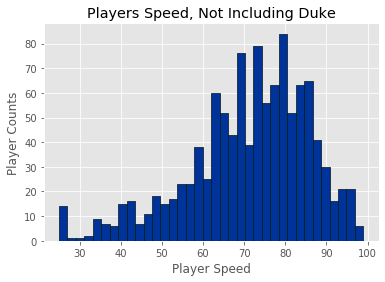

In [17]:
# matplotlib histogram
plt.hist(players_not_duke_arr, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(players_not_duke_arr, hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Players Speed, Not Including Duke')
plt.xlabel('Player Speed')
plt.ylabel('Player Counts')

Text(0, 0.5, 'Player Counts')

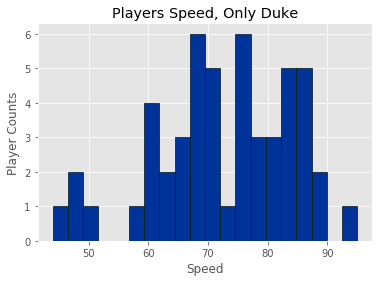

In [20]:
# matplotlib histogram
plt.hist(duke_players_arr, color = 'blue', edgecolor = 'black',bins=20)

# seaborn histogram
sns.distplot(duke_players_arr, hist=True, kde=False, 
             bins=20, color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Players Speed, Only Duke')
plt.xlabel('Speed')
plt.ylabel('Player Counts')

Text(0, 0.5, 'Player Counts')

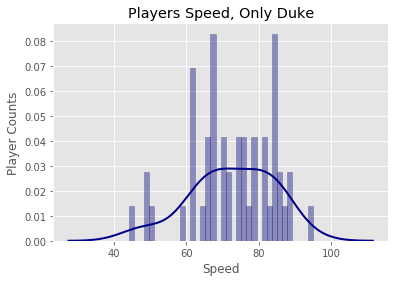

In [21]:
# Density Plot and Histogram of all arrival delays
sns.distplot(duke_players_arr, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Players Speed, Only Duke')
plt.xlabel('Speed')
plt.ylabel('Player Counts')

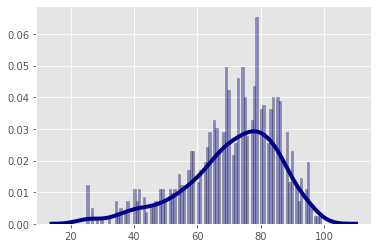

In [22]:
# Density Plot and Histogram of all arrival delays

sns.distplot(players_not_duke_arr, hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

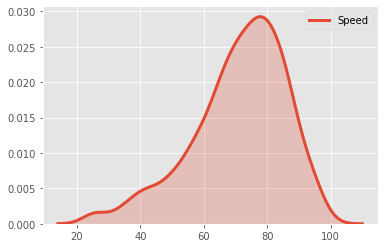

In [23]:
sns.distplot(players_not_duke_arr, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Speed')

In [24]:
filter2 = myteam_player_data["team"]=="San Antonio Spurs"
df_spurs = myteam_player_data.where(filter2)
df_spurs = df_spurs.dropna()
spurs_arr = df_spurs['Defending'].tolist()
players_not_spurs = myteam_player_data[myteam_player_data.team != 'San Antonio Spurs']
players_not_spurs = players_not_spurs['Defending'].tolist()
stats.ttest_ind(players_not_spurs, spurs_arr, equal_var = True)

Ttest_indResult(statistic=1.5160310746096177, pvalue=0.12978300177479177)

In [41]:
filter_guards = myteam_player_data["Postion"]=='G'

In [43]:
df_g = myteam_player_data.where(filter_guards)
df_g = df_g.dropna()
df_g

,Player_Name,team,School,Theme_Type,Postion,Weight,Height,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
6,'94 Penny Hardaway,Orlando Magic,Memphis,Rewards,G,195lbs (88kg),"6'7"" (200cm)",99.0,23.0,89.0,88.0,88.0,90.0,68.0,98.0,95.0,85.0,96.0,88.0,95.0,98.0,98.0,98.0,76.0,70.0,79.0,93.0,97.0,70.0,90.0,97.0,74.0,68.0,84.0,95.0,84.0,70.0,88.0,88.0,80.0,77.0,88.0,88.0,90.0,70.0,95.0,95.0
54,'72 Jerry West,Los Angeles Lakers,West Virginia,Rewards,G,175lbs (79kg),"6'2"" (187cm)",96.0,34.0,89.0,90.0,88.0,80.0,70.0,95.0,97.0,80.0,94.0,88.0,90.0,96.0,95.0,98.0,35.0,35.0,35.0,82.0,96.0,25.0,25.0,85.0,59.0,63.0,63.0,98.0,92.0,44.0,97.0,95.0,96.0,88.0,95.0,96.0,96.0,40.0,90.0,95.0
57,'82 Isiah Thomas,Detroit Pistons,Indiana,Rewards,G,180lbs (81kg),"6'1"" (185cm)",96.0,21.0,93.0,94.0,94.0,84.0,65.0,97.0,96.0,90.0,97.0,94.0,97.0,97.0,97.0,98.0,42.0,35.0,45.0,80.0,97.0,25.0,65.0,89.0,44.0,25.0,29.0,99.0,88.0,40.0,87.0,89.0,94.0,92.0,88.0,94.0,88.0,55.0,97.0,90.0
66,'98 Mark Price,Cleveland Cavaliers,Georgia Tech,Rewards,G,170lbs (77kg),"6'0"" (182cm)",96.0,34.0,80.0,79.0,79.0,76.0,40.0,95.0,98.0,92.0,93.0,79.0,94.0,95.0,95.0,96.0,42.0,38.0,44.0,73.0,89.0,25.0,25.0,88.0,25.0,25.0,29.0,95.0,83.0,52.0,85.0,87.0,87.0,85.0,88.0,83.0,84.0,27.0,94.0,89.0
69,'91 Magic Johnson,Los Angeles Lakers,Michigan State,Rewards,G,220lbs (99kg),"6'9"" (205cm)",95.0,32.0,83.0,81.0,81.0,70.0,86.0,97.0,97.0,99.0,95.0,81.0,94.0,98.0,96.0,98.0,87.0,86.0,88.0,89.0,94.0,65.0,65.0,88.0,91.0,96.0,75.0,98.0,88.0,80.0,90.0,94.0,95.0,80.0,98.0,97.0,75.0,74.0,94.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,Carsen Edwards,Boston Celtics,Purdue,'20 NBA,G,199lbs (90kg),"6'0"" (182cm)",70.0,21.0,74.0,76.0,76.0,69.0,34.0,80.0,51.0,80.0,71.0,80.0,81.0,70.0,62.0,69.0,41.0,27.0,47.0,56.0,65.0,25.0,40.0,47.0,25.0,25.0,55.0,75.0,57.0,26.0,54.0,49.0,64.0,65.0,43.0,64.0,55.0,39.0,81.0,30.0
1124,Devonte Graham,Charlotte Hornets,Kansas,'20 NBA,G,185lbs (83kg),"6'2"" (187cm)",69.0,24.0,72.0,71.0,72.0,76.0,31.0,79.0,84.0,80.0,71.0,71.0,78.0,69.0,69.0,65.0,39.0,30.0,43.0,56.0,70.0,25.0,57.0,62.0,33.0,27.0,29.0,76.0,63.0,27.0,64.0,62.0,66.0,73.0,65.0,70.0,46.0,29.0,78.0,37.0
1128,Elie Okobo,Phoenix Suns,ance,'20 NBA,G,190lbs (86kg),"6'3"" (190cm)",69.0,22.0,74.0,75.0,74.0,70.0,47.0,80.0,60.0,80.0,72.0,75.0,81.0,73.0,62.0,73.0,40.0,27.0,45.0,55.0,69.0,25.0,35.0,42.0,33.0,27.0,39.0,70.0,63.0,43.0,64.0,62.0,68.0,71.0,60.0,67.0,41.0,35.0,81.0,35.0
1156,Isaac Bonga,Washington Wizards,Germany,'20 NBA,G,180lbs (81kg),"6'8"" (203cm)",68.0,20.0,67.0,74.0,59.0,76.0,39.0,74.0,64.0,80.0,67.0,40.0,75.0,76.0,60.0,76.0,58.0,56.0,59.0,67.0,75.0,54.0,64.0,43.0,43.0,52.0,61.0,79.0,63.0,54.0,65.0,64.0,62.0,72.0,54.0,52.0,69.0,66.0,75.0,34.0


In [32]:
myteam_player_data.groupby('Postion').count()

,Player_Name,team,School,Theme_Type,Weight,Height,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
Postion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
F/SF,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
F/﻿C,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
G,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
G/PF,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
G/SG,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
SF,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
SF/PF,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
SF/PG,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [46]:
guard_arr = df_g['Speed'].tolist()

filter_SG = myteam_player_data["Postion"]=='SG'
df_SG = myteam_player_data.where(filter_SG)
df_SG = df_SG.dropna()
SG_arr = df_SG['Speed'].tolist()

In [48]:
stats.ttest_ind(SG_arr,guard_arr, equal_var = True)

Ttest_indResult(statistic=-4.710360489588492, pvalue=4.480942868518784e-06)